In [2]:
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import numpy as np

import pylab as pl
from sklearn import svm
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve, auc
random_state = np.random.RandomState(0)


dataframe = read_csv('pima-indians-diabetes.csv')

array = dataframe.values
X = array[:,0:8]
Y = array[:,8]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.50, random_state=1)
classifier1 = LogisticRegression()
classifier2 = svm.SVC(kernel='linear', probability=True)
probas1_ = classifier1.fit(X_train, y_train).predict_proba(X_test)
probas2_ = classifier2.fit(X_train, y_train).predict_proba(X_test)

In [3]:
# Compute ROC curve and area the curve for logistic
fpr1, tpr1, thresholds1 = roc_curve(y_test, probas1_[:, 1])
roc_auc1 = auc(fpr1, tpr1)
print("Area under the ROC curve : %f" % roc_auc1)

Area under the ROC curve : 0.814422


In [4]:
# Compute ROC curve and area the curve
fpr2, tpr2, thresholds2 = roc_curve(y_test, probas2_[:, 1])
roc_auc2 = auc(fpr2, tpr2)
print("Area under the ROC curve : %f" % roc_auc2)

Area under the ROC curve : 0.836043


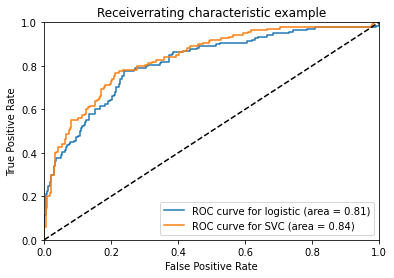

In [5]:
# Plot the ROC

# Plot ROC curve
pl.clf()
pl.plot(fpr1, tpr1, label='ROC curve for logistic (area = %0.2f)' % roc_auc1)
pl.plot(fpr2, tpr2, label='ROC curve for SVC (area = %0.2f)' % roc_auc2)
pl.plot([0, 1], [0, 1], 'k--')
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.0])
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('Receiverrating characteristic example')
pl.legend(loc="lower right")
pl.show()

In [6]:
import pandas as pd

i = np.arange(len(tpr1)) # index for df
roc1 = pd.DataFrame({'fpr1' : pd.Series(fpr1, index=i),'tpr1' : pd.Series(tpr1, index = i), '1-fpr1' : pd.Series(1-fpr1, index = i), 'tf1' : pd.Series(tpr1 - (1-fpr1), index = i), 'thresholds1' : pd.Series(thresholds1, index = i)})
print(roc1.loc[(roc1.tf1-0).abs().argsort()[:1]])

i = np.arange(len(tpr2)) # index for df
roc2 = pd.DataFrame({'fpr2' : pd.Series(fpr2, index=i),'tpr2' : pd.Series(tpr2, index = i), '1-fpr2' : pd.Series(1-fpr2, index = i), 'tf2' : pd.Series(tpr2 - (1-fpr2), index = i), 'thresholds2' : pd.Series(thresholds2, index = i)})
print(roc2.loc[(roc2.tf2-0).abs().argsort()[:1]])

        fpr1      tpr1    1-fpr1       tf1  thresholds1
77  0.239837  0.753623  0.760163 -0.006539     0.334539
        fpr2      tpr2    1-fpr2      tf2  thresholds2
70  0.223577  0.775362  0.776423 -0.00106     0.328769


In [7]:
roc1.head(71)

,fpr1,tpr1,1-fpr1,tf1,thresholds1
0,0.000000,0.000000,1.000000,-1.000000,1.899490
1,0.000000,0.007246,1.000000,-0.992754,0.899490
2,0.000000,0.115942,1.000000,-0.884058,0.769293
3,0.004065,0.115942,0.995935,-0.879993,0.754671
4,0.004065,0.210145,0.995935,-0.785790,0.697723
...,...,...,...,...,...
66,0.207317,0.666667,0.792683,-0.126016,0.375282
67,0.211382,0.666667,0.788618,-0.121951,0.370939
68,0.211382,0.681159,0.788618,-0.107458,0.367272
69,0.215447,0.681159,0.784553,-0.103393,0.363250


In [8]:
roc2.head(71)

,fpr2,tpr2,1-fpr2,tf2,thresholds2
0,0.000000,0.000000,1.000000,-1.000000,1.963923
1,0.000000,0.007246,1.000000,-0.992754,0.963923
2,0.000000,0.057971,1.000000,-0.942029,0.866798
3,0.004065,0.057971,0.995935,-0.937964,0.866077
4,0.004065,0.144928,0.995935,-0.851007,0.801467
...,...,...,...,...,...
66,0.207317,0.753623,0.792683,-0.039060,0.341989
67,0.211382,0.753623,0.788618,-0.034995,0.340188
68,0.211382,0.768116,0.788618,-0.020502,0.334269
69,0.223577,0.768116,0.776423,-0.008307,0.332495
